In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import scipy.stats as stats

### We will build a regession model to check for relationship between nummber of bikes at a station and charactertics of POI like ratings and review


### Loading dataset from the previous step

In [212]:
city_bikes_yelp_merged = pd.read_csv('city_bikes_yelp_merged.csv', index_col=[0])


In [213]:
city_bikes_yelp_merged.head(2)

,name_x,rating,review_count,latitude_x,longitude_x,categories,location,city_bikes_ll,latitude_y,longitude_y,name_y,free_bikes,empty_slots,extra.uid,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286


In [214]:
city_bikes_yelp_merged.shape

(4383, 16)

In [215]:
city_bikes_yelp_merged.drop(columns=['latitude_y','longitude_y','extra.uid'],inplace=True)

In [216]:
city_bikes_yelp_merged.head()

,name_x,rating,review_count,latitude_x,longitude_x,categories,location,city_bikes_ll,name_y,free_bikes,empty_slots,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
2,L'Astrance,4.5,62,48.858440,2.287340,French,4 rue Beethoven,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
3,Crêperie Framboise Passy-Trocadéro,4.5,64,48.858829,2.285040,"Creperies, Gluten-Free",10 bd Delessert,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
4,Girafe,3.5,93,48.862584,2.288581,"French, Seafood",1 place du Trocadéro,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286


In [217]:
city_bikes_yelp_merged.head()

,name_x,rating,review_count,latitude_x,longitude_x,categories,location,city_bikes_ll,name_y,free_bikes,empty_slots,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
2,L'Astrance,4.5,62,48.858440,2.287340,French,4 rue Beethoven,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
3,Crêperie Framboise Passy-Trocadéro,4.5,64,48.858829,2.285040,"Creperies, Gluten-Free",10 bd Delessert,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286
4,Girafe,3.5,93,48.862584,2.288581,"French, Seafood",1 place du Trocadéro,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,35,85.714286


### Checking data for descriptive statistics

In [218]:
city_bikes_yelp_merged.describe()

,rating,review_count,latitude_x,longitude_x,free_bikes,empty_slots,Total_slots,Station_usage_percentage
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4373.000000
mean,3.936459,31.370522,48.856897,2.336021,12.714123,17.918549,30.632672,57.205293
std,0.812535,82.457461,0.034739,0.068527,10.664961,13.006914,11.564699,30.852977
min,0.000000,0.000000,48.759823,2.091540,0.000000,0.000000,0.000000,0.000000
25%,3.500000,2.000000,48.833460,2.289291,4.000000,8.000000,22.000000,31.034483
50%,4.000000,9.000000,48.856980,2.337050,10.000000,16.000000,28.000000,62.500000
75%,4.500000,30.000000,48.881042,2.380656,18.000000,24.000000,36.000000,84.210526
max,5.000000,2045.000000,49.003422,2.544990,66.000000,66.000000,71.000000,100.000000


### Checking correlation in the data frame

In [219]:
city_bikes_yelp_merged.corr()

,rating,review_count,latitude_x,longitude_x,free_bikes,empty_slots,Total_slots,Station_usage_percentage
rating,1.000000,0.042204,-0.029507,-0.005046,-0.013144,0.054227,0.048868,0.043762
review_count,0.042204,1.000000,0.029491,0.001544,-0.057444,0.134518,0.098320,0.133024
latitude_x,-0.029507,0.029491,1.000000,-0.142330,-0.034062,0.038937,0.012381,0.032924
longitude_x,-0.005046,0.001544,-0.142330,1.000000,-0.007107,0.060825,0.061856,0.035559
free_bikes,-0.013144,-0.057444,-0.034062,-0.007107,1.000000,-0.537705,0.317438,-0.848236
empty_slots,0.054227,0.134518,0.038937,0.060825,-0.537705,1.000000,0.628837,0.794677
Total_slots,0.048868,0.098320,0.012381,0.061856,0.317438,0.628837,1.000000,0.111768
Station_usage_percentage,0.043762,0.133024,0.032924,0.035559,-0.848236,0.794677,0.111768,1.000000


## Data visualization
Let check using visualization if we can see any relationships

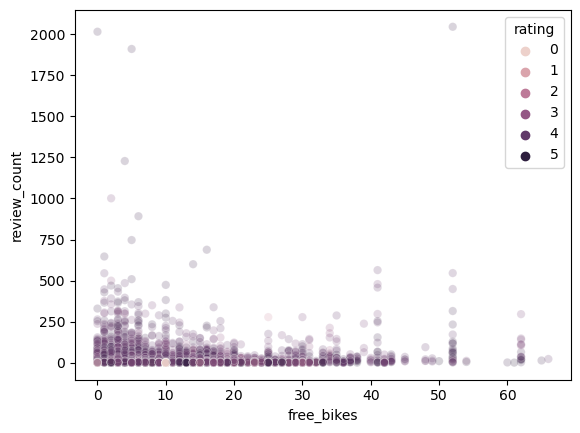

In [220]:
sns.scatterplot(data=city_bikes_yelp_merged, x="free_bikes", y="review_count",hue='rating',alpha = .2)
plt.show()

### We observe there is outlier with review count of more than 1750. Lets track this outlier


In [221]:
outlier = city_bikes_yelp_merged[city_bikes_yelp_merged['review_count'] > 1750]

In [222]:
outlier

,name_x,rating,review_count,latitude_x,longitude_x,categories,location,city_bikes_ll,name_y,free_bikes,empty_slots,Total_slots,Station_usage_percentage
243,Musée du Louvre,4.5,2015,48.862060,2.334521,Museums,Place du Carrousel,"48.853147816545,2.3263905197382",Raspail - Varenne,0,17,17,100.000000
473,La Tour Eiffel,4.5,2045,48.858368,2.294480,Landmarks & Historical Buildings,5 avenue Anatole France,"48.851315406715976,2.2919502854347233",Grenelle - Dr Finlay,52,19,71,26.760563
1077,L'As du Fallafel,4.5,1910,48.857498,2.359080,"Kosher, Sandwiches, Falafel",34 rue des Rosiers,"48.849063299501,2.3558086529374",Institut du Monde Arabe - Saint-Germain,5,31,36,86.111111


### These are the POIs with high amount of review. Even if we drop these there should not be any difference in the data pattern

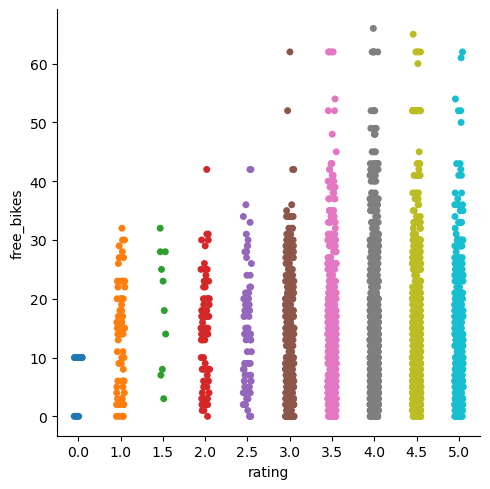

In [223]:
sns.catplot(data=city_bikes_yelp_merged, x="rating", y="free_bikes")
plt.show()

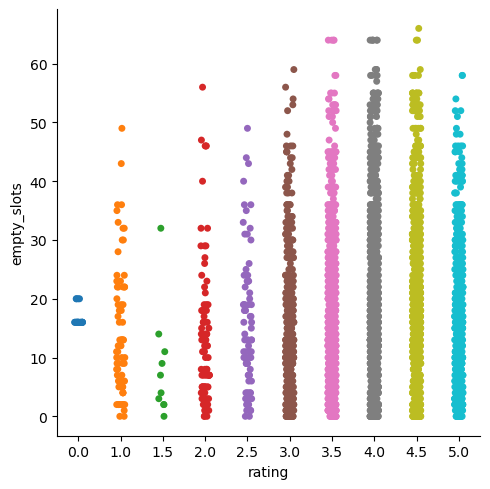

In [224]:
sns.catplot(data=city_bikes_yelp_merged, x="rating", y="empty_slots")
plt.show()

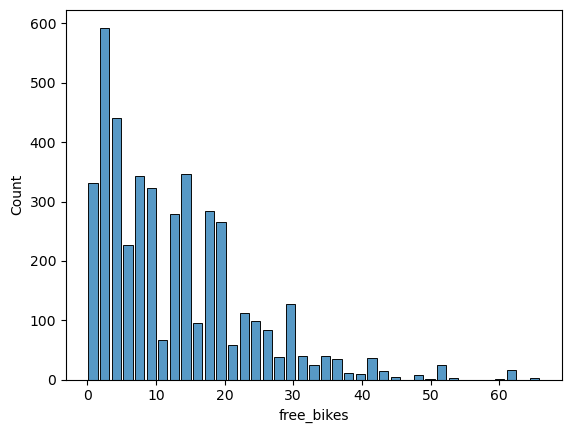

In [225]:
sns.histplot(data=city_bikes_yelp_merged, x="free_bikes", shrink=.8)
plt.show()

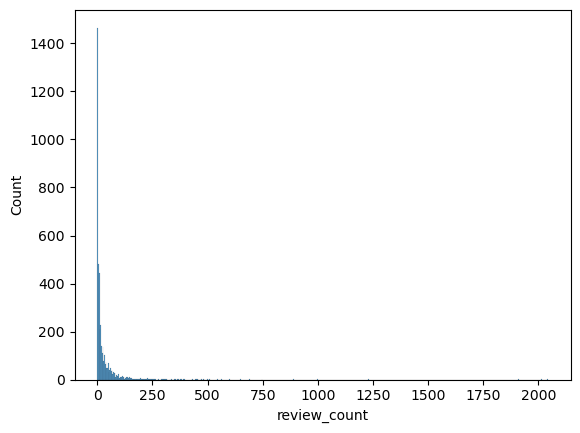

In [226]:
sns.histplot(data=city_bikes_yelp_merged, x="review_count")
plt.show()

### As observed we dont have normal distribution for free bikes and review_count and data is right skewed


## Hypothesis testing
 We can do hypothesis testing for the below below scenario
    
    H0 -> There is no relationship between review , ratings and number of bikes 
    Ha -> There is relationship between review , ratings and number of bikes 

### We can use pearson correlation test to check correlation between review,rating and number of bikes

In [227]:
from scipy.stats import pearsonr

In [228]:
stat,p = pearsonr(city_bikes_yelp_merged["rating"] , city_bikes_yelp_merged["free_bikes"])

In [229]:
print (stat,p)

-0.013144028128755075 0.3843115373230677


### As observed the p-value is greater then 0.05 so we cannot reject null hypothesis

## Regression Model

### Lets build regression model to check for the number of bikes. There could be a scenario where for a new bike station, the bike company wants to know the number of bikes they need to install on the new station if we know the POIs ratings and reviews in the vicinity

#### Y will the number of bikes we want to predict and x will be the independent variable used to predict Y

In [230]:
x = city_bikes_yelp_merged[["rating", "review_count"]]
y = city_bikes_yelp_merged["free_bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             free_bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.504
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           0.000558
Time:                        00:50:09   Log-Likelihood:                -16586.
No. Observations:                4383   AIC:                         3.318e+04
Df Residuals:                    4380   BIC:                         3.320e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.5002      0.796     16.954      0.000      11.939      15.061
rating          -0.1410      0.198     -0.711      0.477      -0.529       0.248
review_count    -0.0074      0.002     -3.775      0.000      -0.011      -0.004
==============================================================================
Omnibus:                     1136.311   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2824.563
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                       5.729   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We observd from the above result the R-squared value to very less 0.008 meaning only 0.8% of the model can be explained using this approach which is not feasible

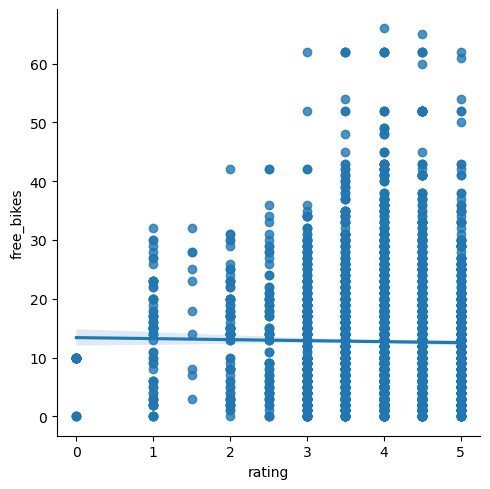

In [231]:
# Let's now visualize our linear regression model using the 'lmplot' function from Seaborn:

sns.lmplot(x='rating', y='free_bikes', data=city_bikes_yelp_merged)

plt.show()

### Previous we used both reveiew and rating for our model. lets use only Using review_ to see if we can find any relationshop

### Using review_count as X

In [232]:
x = city_bikes_yelp_merged[["review_count"]]
y = city_bikes_yelp_merged["free_bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             free_bikes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           0.000142
Time:                        00:50:11   Log-Likelihood:                -16586.
No. Observations:                4383   AIC:                         3.318e+04
Df Residuals:                    4381   BIC:                         3.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.9472      0.172     75.233      0.000      12.610      13.285
review_count    -0.0074      0.002     -3.808      0.000      -0.011      -0.004
==============================================================================
Omnibus:                     1133.692   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2809.881
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                       5.718   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

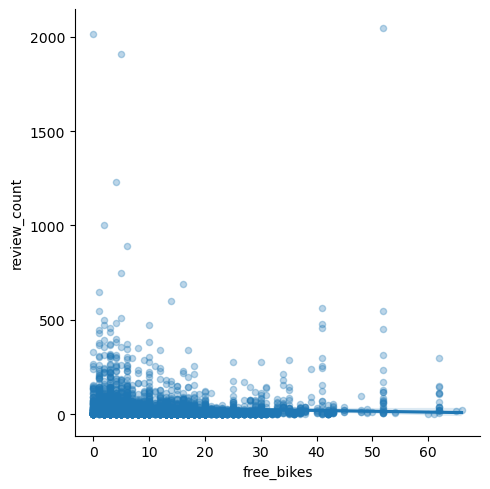

In [233]:
# Let's now visualize our linear regression model using the 'lmplot' function from Seaborn:

sns.lmplot(x='free_bikes', y='review_count', data=city_bikes_yelp_merged,scatter_kws={'s':20,'alpha':0.3})

plt.show()

# Stretch

### How can you turn the regression model into a classification model?



### We can turn the ratings feature c into categoriacal variable loke rating 1-2 = Bad , rating 2 - 4 = Good and rating > 4 could be Excellent. Then we can further analyze using classification models.